# Homework 5
This homework requires `wine.csv`, and the `tidyverse` and `Rtsne` packages. Install them if you haven't already!  
See the following link for how to add new packages to Binder: https://github.com/rjenki/BIOS512?tab=readme-ov-file#adding-packages-to-installr-later.   
**For readability and easier processing, please make each question part a different code chunk.**

In [1]:
library(tidyverse)
library(Rtsne)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


ERROR: Error in library(Rtsne): there is no package called ‘Rtsne’


## Question 1  

#### a) Import your data.  
#### b) Check out the columns present using one of R's data frame summary.  
#### c) Get summary statistics on the numeric variables.  

In [7]:
# a)
data <- read_csv('wine.csv', show_col_types = FALSE)
head(data, 10)

Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1


In [9]:
# b) and c)
summary(data)

    Alcohol        Malicacid          Ash        Alcalinity_of_ash
 Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60    
 1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20    
 Median :13.05   Median :1.865   Median :2.360   Median :19.50    
 Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49    
 3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50    
 Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00    
   Magnesium      Total_phenols     Flavanoids    Nonflavanoid_phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300      
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700      
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400      
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619      
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375      
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600      
 Proanthocyanins Color_intensity  

## Question 2

#### a) Scale and center your data  
*Hint:* Use a `mutate()` statement across all columns **except class** with `function(x) as.numeric(scale(x))`.

#### b) Based on what you saw in the summary statistic table from the imported data, why would scaling and centering this data be helpful before we perform PCA?


In [27]:
# a)
scaled <- data %>% mutate(across(-class, ~ as.numeric(scale(.x))))
head(scaled,10)

# b) From the summary stats, we can see that the mean and variance of the variables are in different   
# magnitudes. Scaling and centering ensure that the influences of deviations are minimized. In addition
# this would also ensure the data is centered around the origin, making it easier to visualize. 

Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.5143408,-0.56066822,0.2313998,-1.1663032,1.90852151,0.8067217,1.0319081,-0.6577078,1.2214385,0.251008784,0.3611585,1.8427215,1.01015939,1
0.2455968,-0.49800856,-0.8256672,-2.4838405,0.01809398,0.5670481,0.7315653,-0.8184106,-0.5431887,-0.292496232,0.4049085,1.1103172,0.96252635,1
0.1963252,0.02117152,1.1062139,-0.2679823,0.08810981,0.8067217,1.2121137,-0.4970050,2.1299594,0.268262912,0.3174085,0.7863692,1.39122370,1
1.6867914,-0.34583508,0.4865539,-0.8069748,0.92829983,2.4844372,1.4623994,-0.9791134,1.0292513,1.182731669,-0.4263410,1.1807407,2.32800680,1
0.2948684,0.22705328,1.8352256,0.4506745,1.27837900,0.8067217,0.6614853,0.2261576,0.4002753,-0.318377423,0.3611585,0.4483365,-0.03776747,1
1.4773871,-0.51591132,0.3043010,-1.2860793,0.85828399,1.5576991,1.3622851,-0.1755994,0.6623487,0.729810822,0.4049085,0.3356589,2.23274072,1
1.7114272,-0.41744613,0.3043010,-1.4657435,-0.26196936,0.3273744,0.4912911,-0.4970050,0.6798202,0.082781041,0.2736585,1.3638418,1.72465497,1
1.3049364,-0.16680747,0.8875103,-0.5674226,1.48842650,0.4871569,0.4812796,-0.4166536,-0.5956034,-0.003489596,0.4486584,1.3638418,1.74053265,1
2.2534149,-0.62332789,-0.7163155,-1.6454077,-0.19195352,0.8067217,0.9518167,-0.5773564,0.6798202,0.061213382,0.5361584,0.3356589,0.94664867,1


## Question 3

#### a) Perform PCA

#### b) How much of the total variance is explained by PC1? PC2? What function do we use to see that information?

#### c) Why are we doing PCA first?

#### d) What is the rotation matrix? Print it explicitly.  
*Hint:* Check the notes for a simple way to do this!

#### e) Plot PC1 vs. PC2, using the wine class as labels for coloring.  
*Hint:* You'll first need a data set with only PC1 and PC2, then add back the class variable from your scaled data set with a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### f) What do you see after plotting PC1 vs. PC2? What does this mean in context of wine classes?

#### g) Give an example of data where PCA would fail. You can describe the data or do a simulation.  
*Hint:* Our notes have a few examples!

#### h) Explain the difference between vector space and manifold, and how these terms apply to what we did/will do with T-SNE.


In [28]:
# a)
r <- prcomp(scaled)

In [29]:
# b) 2.2798 of total variance is explained by PC1 and 1.5802 is by PC2; summary(r) is used
summary(r)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.2798 1.5802 1.2025 0.96088 0.93177 0.81319 0.74358
Proportion of Variance 0.3821 0.1836 0.1063 0.06789 0.06383 0.04862 0.04065
Cumulative Proportion  0.3821 0.5657 0.6721 0.73995 0.80378 0.85241 0.89306
                           PC8     PC9    PC10   PC11    PC12    PC13   PC14
Standard deviation     0.59107 0.54018 0.50784 0.4752 0.41083 0.34248 0.2086
Proportion of Variance 0.02569 0.02145 0.01896 0.0166 0.01241 0.00862 0.0032
Cumulative Proportion  0.91875 0.94020 0.95916 0.9758 0.98818 0.99680 1.0000

In [ ]:
# c) Performing PCA reduce the dimentionality of the data, reduce the noices, and improve efficiency.
# It can make the following analysis easier. 

In [30]:
# d) rotation matrix
R <- solve(r$rotation)
R

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
PC1,-0.13955411,0.23127877,-0.000758731,0.23029309,-0.13104103,-0.37279237,-0.403237284,0.27884744,-0.29192508,0.08942632,-0.284731497,-0.36064994,-0.27641244,0.3110235281
PC2,-0.48398658,-0.22405231,-0.315929724,0.01126309,-0.30023643,-0.06640436,0.002017377,-0.02760475,-0.04056191,-0.52985700,0.278364629,0.16336820,-0.36566189,-0.0048166342
PC3,-0.20739378,0.08888012,0.626149520,0.61202482,0.13089635,0.14638031,0.150853895,0.17012772,0.14971475,-0.13728178,0.085287218,0.16612694,-0.12670975,0.0009623389
PC4,-0.05202454,0.50792619,-0.234839101,0.06750549,-0.25528136,0.19504272,0.148853644,-0.27078415,0.43527140,0.06919472,-0.436095641,0.17104798,-0.24708206,0.0785549229
PC5,0.26128775,0.09224016,0.120560926,-0.05695664,-0.75961835,0.14215523,0.107843453,0.47058669,-0.12361143,0.05497895,0.097894204,0.12525099,0.12092559,-0.1301334861
PC6,0.16536102,0.58008658,0.125924371,-0.09534441,0.10479264,-0.12544691,-0.046749718,-0.25340042,-0.49254225,-0.42598886,0.050926361,0.23652420,0.08811233,-0.1665133820
PC7,0.08109663,-0.38986636,0.161456922,0.27494282,-0.32783323,0.03482640,0.065571524,-0.60671679,-0.40687583,0.19989161,-0.205092801,0.06766169,-0.06157391,0.0523084349
PC8,0.41085968,0.07811783,-0.171511416,0.42011625,-0.15219546,-0.38223991,-0.180723075,-0.23206171,0.35471193,-0.03762399,0.463538356,-0.07290702,0.11513687,0.0521340698
PC9,-0.48056233,0.03061612,0.286299064,-0.15910053,-0.26275246,-0.35387300,-0.072503670,-0.17571862,0.24105395,-0.06894372,-0.157966956,-0.10633712,0.56477893,-0.1111169252
PC10,0.26657031,-0.32214644,-0.081445765,0.11386621,0.10095846,-0.32340394,-0.150837960,0.23033372,0.12403042,-0.24930845,-0.523691016,0.48422273,0.04337797,-0.1638009613


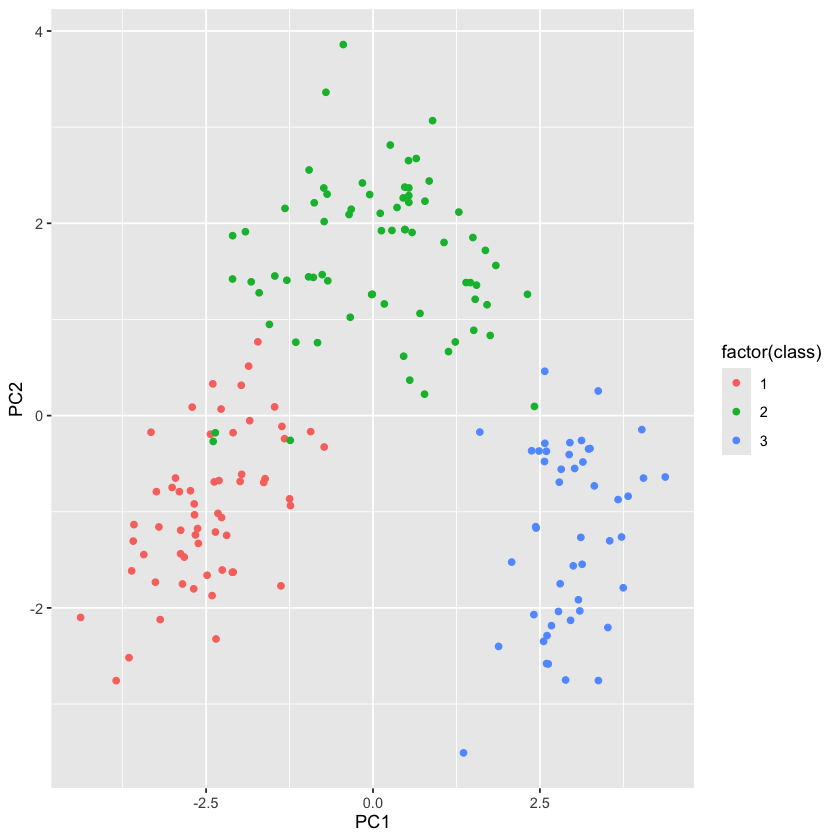

In [37]:
# e) 
pca_df <- as.data.frame(r$x[, 1:2]) %>%
  rename(PC1 = PC1, PC2 = PC2) %>%
  mutate(class = scaled$class)

ggplot(pca_df, aes(x = PC1, y = PC2, color = factor(class))) +
  geom_point()

# f) The wine class are clusters of data points except for some outliers. This means that the features
# are able to classify the wine into classes. The PC1 and PC2 are the most important differences 
# to distinguish wine types. 

In [38]:
# g) When the data circles around one axis. The average distances of the values from one axis is the 
# same across the other axis, then it is imposible to perform PCA. This is because the algorism cannot
# distinguish which axis is the next best one. 

In [ ]:
# h) Vector space: a space where data points are vectors and combine linearly. PCA assumes data 
# points are in vector space. 
# Manifold: a lower-dimensional curved surface in a higher-dimensional space. t-SNE use this concept
# and find clusters from the manifold. 

## Question 4
#### a) Perform T-SNE
Set `seed = 123`.  
*Hint:* Subset your PCA results to PC1–PC10, add the class variable back in, remove duplicates, then perform T-SNE.

#### b) Plot the results in 2D
*Hint:* Convert your T-SNE results to a tibble and add back the class variable from your scaled data set using a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### c) Why didn't we stop at PCA?


#### d) What other types of data does this workflow make sense for?



In [44]:
install.packages("Rtsne")
library(Rtsne)


The downloaded binary packages are in
	/var/folders/0q/ndh_pk0s37n95y6svtjfy7hw0000gp/T//RtmpQ2vOPg/downloaded_packages


In [48]:
# a)
library(Rtsne)

pca_subset <- as_tibble(r$x[, 1:10]) %>%
  mutate(class = scaled$class) %>%
  distinct()  # remove duplicates
X <- pca_subset %>% select(-class) %>% as.matrix()

set.seed(123)
tsne_out <- Rtsne(X, dims = 2, perplexity = 30, verbose = TRUE, check_duplicates = FALSE)

Performing PCA
Read the 178 x 10 data matrix successfully!
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.01 seconds (sparsity = 0.610276)!
Learning embedding...
Iteration 50: error is 50.003583 (50 iterations in 0.02 seconds)
Iteration 100: error is 51.616393 (50 iterations in 0.02 seconds)
Iteration 150: error is 51.018076 (50 iterations in 0.02 seconds)
Iteration 200: error is 51.187191 (50 iterations in 0.01 seconds)
Iteration 250: error is 49.925530 (50 iterations in 0.01 seconds)
Iteration 300: error is 0.471796 (50 iterations in 0.01 seconds)
Iteration 350: error is 0.355886 (50 iterations in 0.01 seconds)
Iteration 400: error is 0.338271 (50 iterations in 0.01 seconds)
Iteration 450: error is 0.334770 (50 iterations in 0.01 seconds)
Iteration 500: error is 0.333389 (50 iterations in 0.01 seconds)
Iteration 550: error is 0.331570 (50 iterations in 0.01 seconds)
Iteration 600: error is 0.327129 (50 iterat

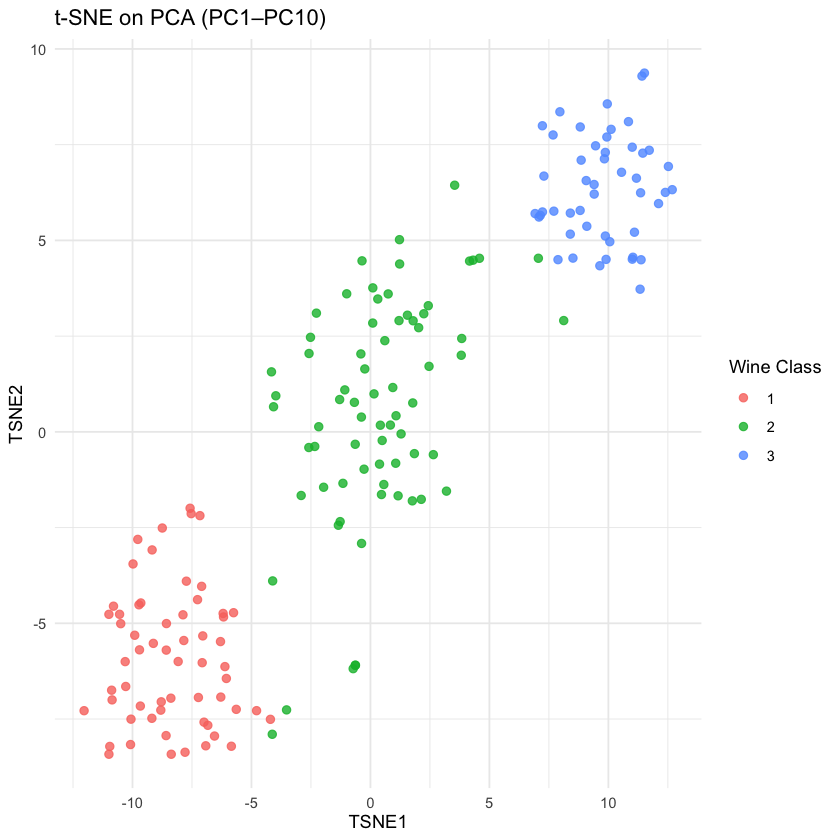

In [49]:
# b)
tsne_df <- as_tibble(tsne_out$Y) %>%
  rename(TSNE1 = V1, TSNE2 = V2) %>%
  mutate(class = pca_subset$class)

ggplot(tsne_df, aes(x = TSNE1, y = TSNE2, color = factor(class))) +
  geom_point(size = 2, alpha = 0.8) +
  labs(color = "Wine Class", title = "t-SNE on PCA (PC1–PC10)") +
  theme_minimal()

In [ ]:
# c) PCA doesn't capture the nonlinear structures in the data, it removes the noices
# and makes the computation easier to work with. We need t-sne to look into local
# nonlinear relationship. 

# d) Any data with complex dimentionality would be suitable for performing PCA and T-SNE. For instance,
# neuroimaging data, user behavior data, price predictors, etc. 